In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class Map(object): 
    def __init__(self,size,learning_rate=0.1):
        self.size = size
        self.learning_rate = learning_rate
        self.neighborhood_radius = 0.01#(np.sqrt(1/2.0)*size)/4 #diagonal of the map
        #self.neurons = np.random.randn(size,size,2)
        self.neurons = np.random.uniform(0,1,(size,size,2))
        
    def find_bmu(self, input_node): #find best matching unit
        min_distance = np.inf
        bum_position = ()
        for row in xrange(self.size):
            for col in xrange(self.size):
                distance = Euclidean_distance(self.neurons[row,col], input_node)
                #print distance
                if distance < min_distance: 
                    min_distance = distance
                    bum_position =(row,col)
                    #print bum_index
        #print "min = ", min_distance
        return bum_position, min_distance
    
    
    def weight_update(self,input_node,bmu_position,new_radius, new_learning_rate): 
        for row in xrange(self.size):
            for col in xrange(self.size):
                current_position = (row,col)
                #print "DDDDDDD"
                #d = Euclidean_distance(bmu_position,np.array(current_position))
                d = Euclidean_distance(self.neurons[bmu_position], self.neurons[current_position])
                h = self.neighborhood_function(d, new_radius)
                delta_weight = input_node - self.neurons[current_position]
                new_weight = self.neurons[current_position] + new_learning_rate*h*delta_weight
                #if new_weight[0] <0:
                    #print "input node ", input_node
                    #print "h " ,h
                    #print "d ",d
                    #print "position ",self.neurons[current_position]
                    #print "bmu ", self.neurons[bmu_position]
                    #print "result ",self.neurons[current_position] + new_learning_rate*h*delta_weight
                    #print
                
                #print current_position
                #print self.neurons[current_position]
                #print "next"
                self.neurons[current_position] = new_weight
                #print "row {0}, col {1}, weight {2}".format(row,col,self.neurons[current_position]) 
    
    def learning_rate_update(self,turn,iteration):
        new_learning_rate = self.learning_rate * np.exp(-turn/float(iteration))
        return new_learning_rate
    
    def neighborhood_function(self, d, new_radius):
        h = np.exp(-np.square(float(d))/(2*np.square(new_radius)))
        #print h,d 
        return h
    
    def radius_update(self, turn, iteration):
        new_radius = self.neighborhood_radius * np.exp(-turn*np.log10(self.neighborhood_radius)/iteration)
        return new_radius
    
    def Kohonen_learning(self, training_set, iteration=1000):
        #print self.neurons
        training_set.plot(kind='scatter',x='x',y='y', c='yellow', alpha = 0.3)
        t = self.neurons.copy()
        t.resize(self.size*self.size,2)
        plt.scatter(t[:,0],t[:,1])
        plt.title("Initialisation")
        plt.show()
 
        train = np.array(training_set.iloc[:,:-1])
        
        for turn in xrange(iteration):
            for input_node in train: 
                bmu_position, d_bum = self.find_bmu(input_node)
                #print "D_bum ",d_bum
                winning_node = self.neurons[bmu_position]
                new_radius = self.radius_update(turn+1, iteration) # turn + 1 to avoid 0
                new_learning_rate = self.learning_rate_update(turn,iteration)
                self.weight_update(input_node,bmu_position,new_radius,new_learning_rate)
            #print "radius = {0}, learning_rate = {1}".format(new_radius, new_learning_rate)
            #print self.neurons
            #print "next"
            training_set.plot(kind='scatter',x='x',y='y', c='yellow', alpha=0.5)
            t = self.neurons.copy()
            t.resize(self.size*self.size,2)
            plt.scatter(t[:,0],t[:,1])
            plt.title("Iteration %d"%(turn + 1)) 
            plt.show()
            
        print "done"
        return self.neurons
        
        

In [3]:
def Euclidean_distance(pointA,pointB): #np array 
    #print pointA, pointB
    #print np.linalg.norm(pointA-pointB)
    #print "pointA {0}, pointB {1}, d = {2}".format(pointA, pointB,np.linalg.norm(pointA-pointB))
    return np.linalg.norm(pointA-pointB)

Create dataframe

In [4]:
def str_to_float(df): 
    new_df = df.copy()
    return new_df.applymap(lambda x: float(x.replace(',','.')))

In [5]:
def z_score(df):
    new_df = df.copy()
    new_df.x = (new_df.x - new_df.x.mean())/new_df.x.std(ddof=0)
    new_df.y = (new_df.y - new_df.y.mean())/new_df.y.std(ddof=0)
    return new_df

In [6]:
def normalize(df):
    new_df = df.copy()
    new_df.x = (new_df.x - new_df.x.min())/(new_df.x.max() - new_df.x.min())
    new_df.y = (new_df.y - new_df.y.min())/(new_df.y.max() - new_df.y.min())
    return new_df

In [7]:
df = pd.read_csv('donneespb4.txt',sep=' ',header=None)
df.columns = ['x','y','Value']
df = str_to_float(df)
#df = z_score(df) 
df = normalize(df)
binary_code = [np.sign(x-.5) for x in df.Value] 
df['Class'] = binary_code 
df = df.drop('Value',1)
df.head()

,x,y,Class
0,0.745443,0.178058,1
1,0.038718,0.298100,-1
2,0.024899,0.335908,-1
3,0.040403,0.556396,-1
4,0.406911,0.876045,1


In [8]:
df.describe()

,x,y,Class
count,3000.000000,3000.000000,3000.000000
mean,0.383886,0.495651,-0.452000
std,0.339727,0.250649,0.892167
min,0.000000,0.000000,-1.000000
25%,0.053838,0.286890,-1.000000
50%,0.266477,0.490487,-1.000000
75%,0.708473,0.713925,1.000000
max,1.000000,1.000000,1.000000


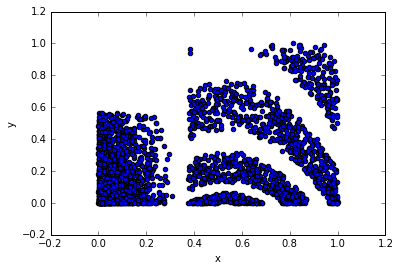

In [9]:
a = df.copy()

a.y = a.y - a.y.mean()
#a.x = a.x - a.x.mean()
a.y = np.square(a.y)
a = normalize(a)

a.plot(kind='scatter',x='x',y='y')

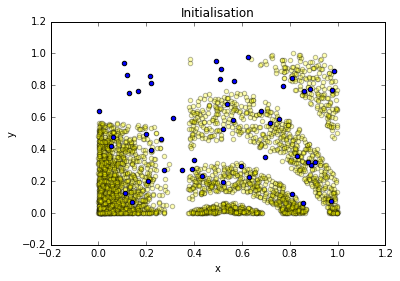

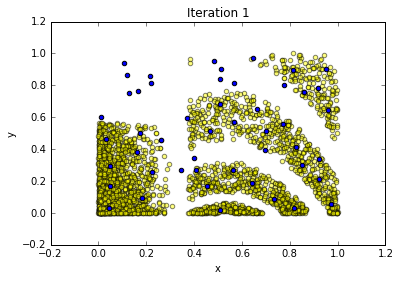

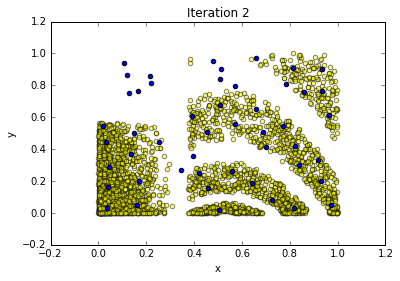

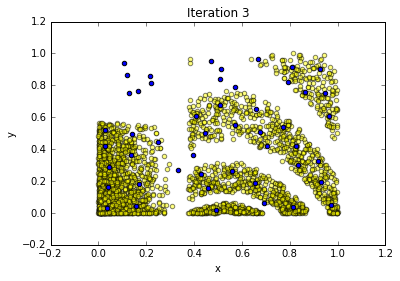

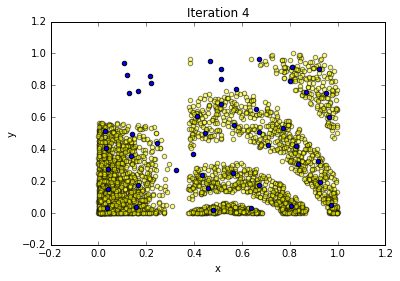

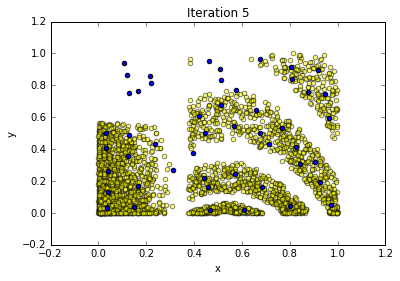

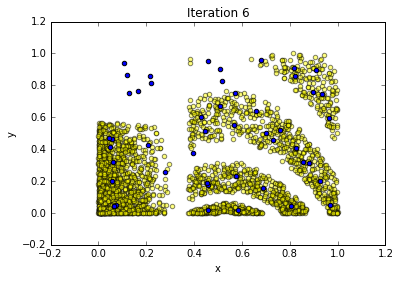

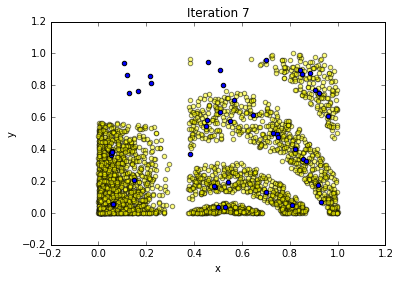

done


In [10]:
m2 = Map(size = 7, learning_rate = 0.04)
result2 = m2.Kohonen_learning(training_set=a.iloc[:,], iteration=7)

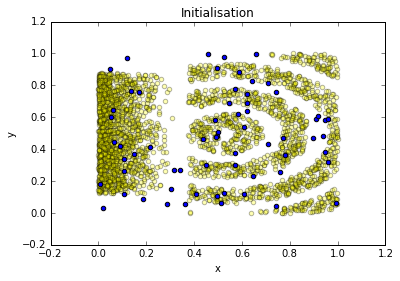

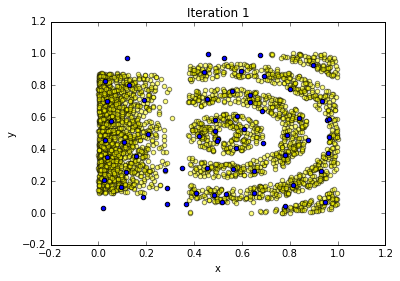

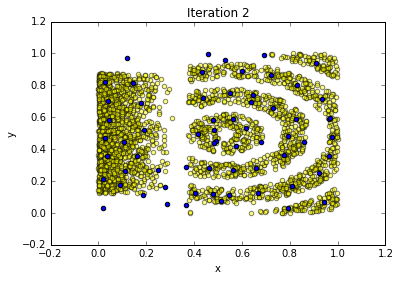

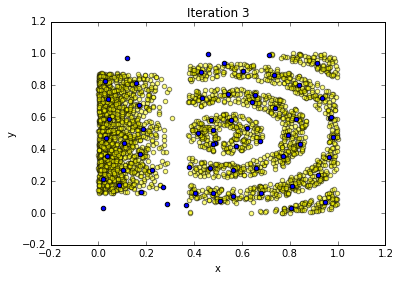

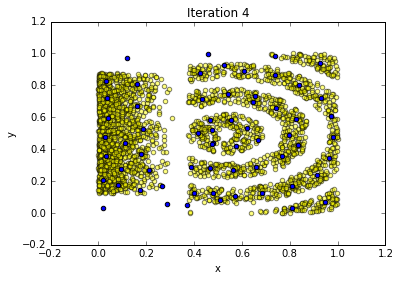

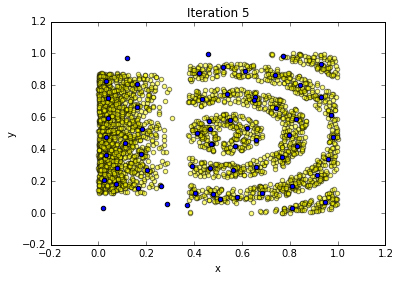

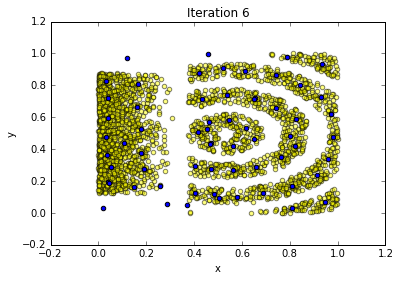

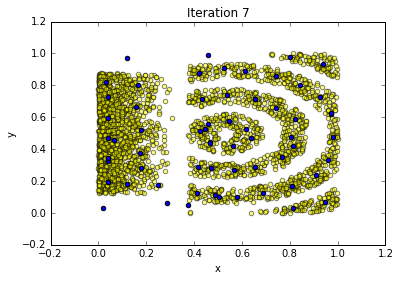

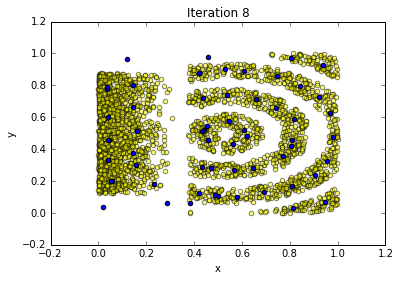

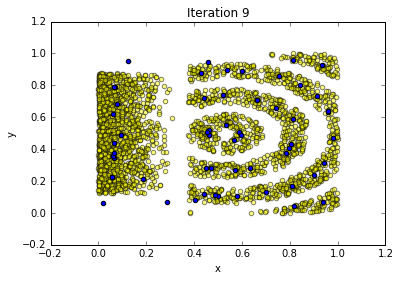

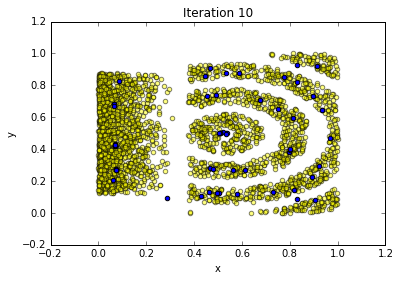

done


In [11]:
m = Map(size = 8, learning_rate = 0.04)
result = m.Kohonen_learning(training_set=df.iloc[:,], iteration=10)

In [12]:
from sklearn import cluster

In [13]:
df2 = df.copy()
df2.y = df2.y - df2.y.mean()
df2.y = np.square(df2.y)
df2 = normalize(df2)
df2.head()

,x,y,Class
0,0.745443,0.396532,1
1,0.038718,0.153424,-1
2,0.024899,0.100318,-1
3,0.040403,0.014506,-1
4,0.406911,0.568860,1


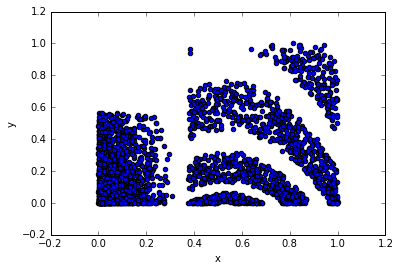

In [14]:
df2.plot(kind='scatter',x='x',y='y')

In [15]:
result2.shape

(7L, 7L, 2L)

In [16]:
kmeans = cluster.KMeans(n_clusters = 5)

t = result2.copy()

t.resize(7*7,2)

kmeans.fit(t)

labels = kmeans.labels_

df2['Cluster'] = predicted_cluster
predicted_cluster = kmeans.predict(df2[['x','y']])
df2.head()



NameError: name 'predicted_cluster' is not defined

In [ ]:
plt.scatter(df2.x,df2.y,c=df2.Cluster, s=50)

In [ ]:
agglo_cluster = cluster.AgglomerativeClustering(n_clusters = 6,affinity='cosine',linkage='average')

t = result2.copy()

t.resize(7*7,2)

agglo_labels = agglo_cluster.fit_predict(t)

#labels = kmeans.labels_
#labels

#predicted_cluster = kmeans.predict(df[['x','y']])

#df['Cluster'] = labels

#df.head()

#plt.scatter(df.x,df.y,c=df.Cluster, s=50)

In [ ]:
test = pd.DataFrame(t, columns =['x','y'])
test['Label'] = agglo_labels
test.head()

In [ ]:
plt.scatter(test.x,test.y,c=test.Label, s=50)